<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/week9_rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ratings = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/ratings.csv")
print(ratings.info())
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
tags = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/tags.csv")
print(tags.info())
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
movies = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week9/movies.csv")
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# 데이터프레임 하나로 합치기
# ratings / movies 는 movieid 기준으로 합치기
# 함친 후, tag의 userid & movieid 기준으로 하나의 df 만들기
rating_movie = pd.merge(movies, ratings, on= ['movieId'])
df = rating_movie.copy()

#df = pd.merge(rating_movie, tags, how='outer', on=["userId", 'movieId'])
#df = df.drop(columns='timestamp_y')
#df = df.rename(columns={'timestamp_x': 'timestamp'})
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [8]:
# title  -> title / year 변수로 나눠주기
df['year'] = df['title'].str.extract('(\(\d\d\d\d\))')
df['year'] = df['year'].str.extract('(\d\d\d\d)')
df['year'] = pd.to_numeric(df['year'])
df['year'] = df['year'].fillna(0)
df['title'] = df.title.str.split('(').str[0]
df.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995.0


In [9]:
print(len(df['year'].unique())) 
df['year'].unique()
# 107개로 년도수가 많음

107


array([1995., 1994., 1996., 1976., 1992., 1967., 1993., 1964., 1977.,
       1965., 1982., 1990., 1991., 1989., 1937., 1940., 1969., 1981.,
       1973., 1970., 1955., 1959., 1968., 1988., 1997., 1972., 1943.,
       1952., 1951., 1957., 1961., 1958., 1954., 1934., 1944., 1960.,
       1963., 1942., 1941., 1953., 1939., 1950., 1946., 1945., 1938.,
       1947., 1935., 1936., 1956., 1949., 1932., 1975., 1974., 1971.,
       1979., 1987., 1986., 1980., 1978., 1985., 1966., 1962., 1983.,
       1984., 1948., 1933., 1931., 1922., 1998., 1929., 1930., 1927.,
       1928., 1999., 2000., 1926., 1919., 1921., 1925., 1923., 2001.,
       2002., 2003., 1920., 1915., 1924., 2004., 1916., 1917., 2005.,
       2006., 1902.,    0., 1903., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 1908.])

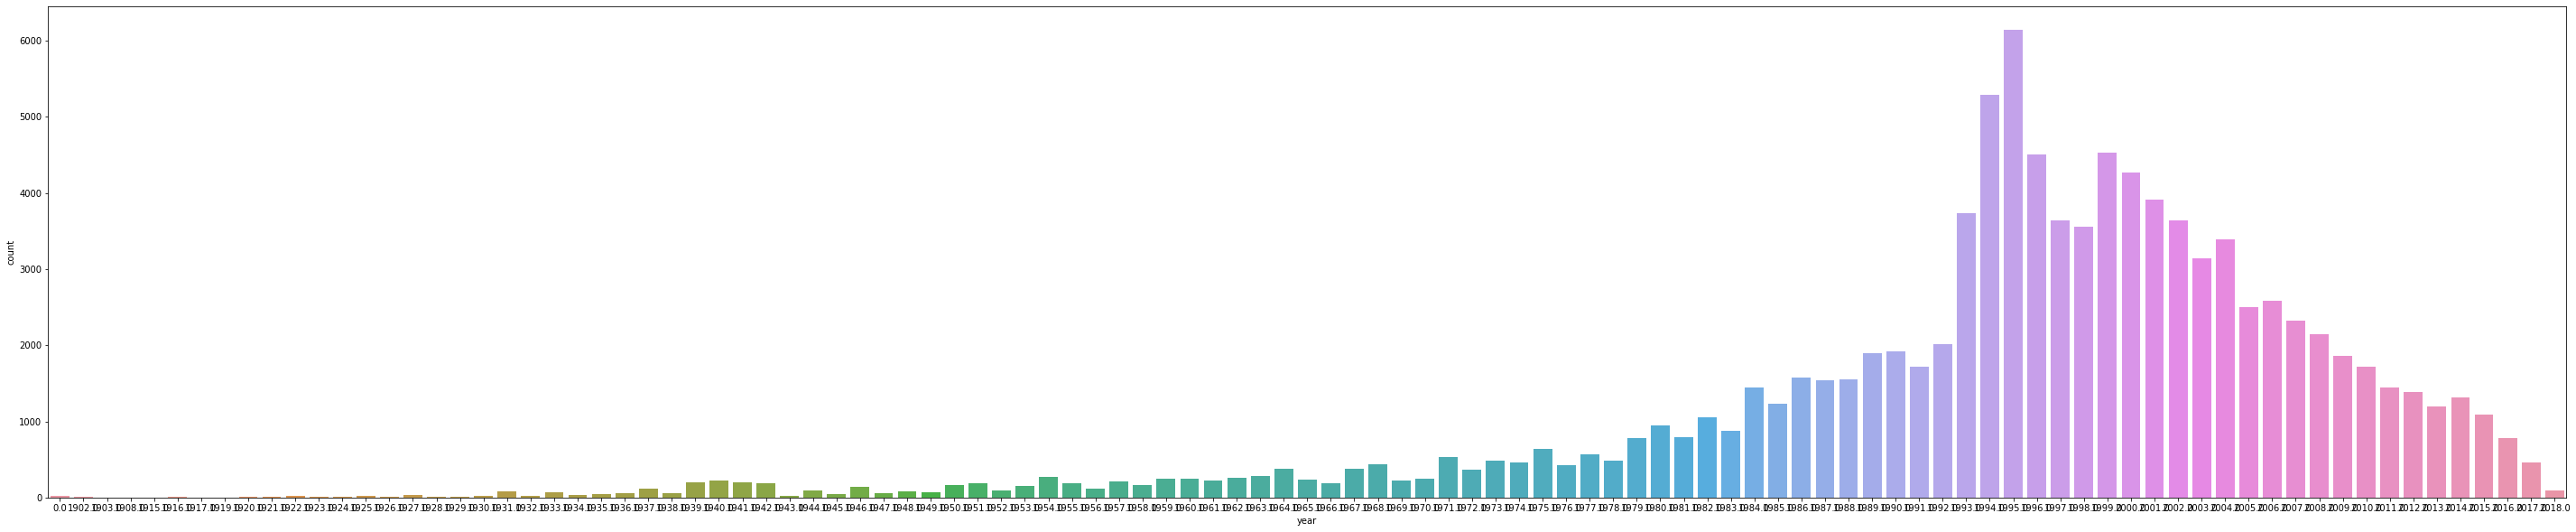

In [13]:
plt.figure(figsize=(50, 10))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
# 연도가 현재와 가까워지는 영화가 많다.

In [14]:
# genres 칼럼 -> "|" 기준으로 리스트 안에 장르 여러개 넣어주기
df['genres'].apply(lambda x : x.split("|"))

genres_list = list(df['genres'].apply(lambda x : x.split("|")))

flat_list=[]
for sublist in genres_list:
  for item in sublist:
    flat_list.append(item)
    
genres_unique = list(set(flat_list))
genres_unique

['Animation',
 'Comedy',
 'Drama',
 'Film-Noir',
 'Fantasy',
 'Sci-Fi',
 'IMAX',
 'Musical',
 'Adventure',
 'Horror',
 '(no genres listed)',
 'War',
 'Thriller',
 'Documentary',
 'Children',
 'Romance',
 'Mystery',
 'Crime',
 'Western',
 'Action']

In [15]:
# 장르별 갯수 확인
counter = {}
for value in flat_list:
    try: counter[value] += 1
    except: counter[value ] = 1

print(counter)

{'Adventure': 24161, 'Animation': 6988, 'Children': 9208, 'Comedy': 39053, 'Fantasy': 11834, 'Romance': 18124, 'Drama': 41928, 'Action': 30635, 'Crime': 16681, 'Thriller': 26452, 'Horror': 7291, 'Mystery': 7674, 'Sci-Fi': 17243, 'War': 4859, 'Musical': 4138, 'Documentary': 1219, 'IMAX': 4145, 'Western': 1930, 'Film-Noir': 870, '(no genres listed)': 47}


In [16]:
# 장르 오름차순
counter_sort = sorted(counter.items(), key=lambda x: x[1], reverse=True)
counter = dict(counter_sort)
print(counter)

{'Drama': 41928, 'Comedy': 39053, 'Action': 30635, 'Thriller': 26452, 'Adventure': 24161, 'Romance': 18124, 'Sci-Fi': 17243, 'Crime': 16681, 'Fantasy': 11834, 'Children': 9208, 'Mystery': 7674, 'Horror': 7291, 'Animation': 6988, 'War': 4859, 'IMAX': 4145, 'Musical': 4138, 'Western': 1930, 'Documentary': 1219, 'Film-Noir': 870, '(no genres listed)': 47}


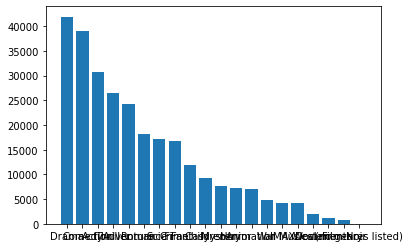

<Figure size 3600x3600 with 0 Axes>

영화 장르 내림차순 dict_keys(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance', 'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror', 'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir', '(no genres listed)'])


In [17]:
plt.bar(*zip(*counter.items()))
plt.figure(figsize=(50, 50))
plt.show()

print("영화 장르 내림차순", counter.keys())
# 'Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance', 'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror', 'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir', '(no genres listed)' 순으로 장르가 많다

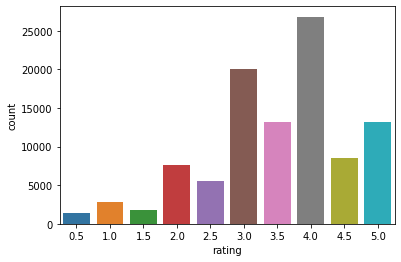

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# rating 값 확인
sns.countplot(x="rating", data=df)
plt.show()

In [19]:
df.describe()

,movieId,userId,rating,timestamp,year
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.000000
mean,19435.295718,326.127564,3.501557,1.205946e+09,1994.088966
std,35530.987199,182.618491,1.042529,2.162610e+08,30.268197
min,1.000000,1.000000,0.500000,8.281246e+08,0.000000
25%,1199.000000,177.000000,3.000000,1.019124e+09,1990.000000
50%,2991.000000,325.000000,3.500000,1.186087e+09,1997.000000
75%,8122.000000,477.000000,4.000000,1.435994e+09,2003.000000
max,193609.000000,610.000000,5.000000,1.537799e+09,2018.000000


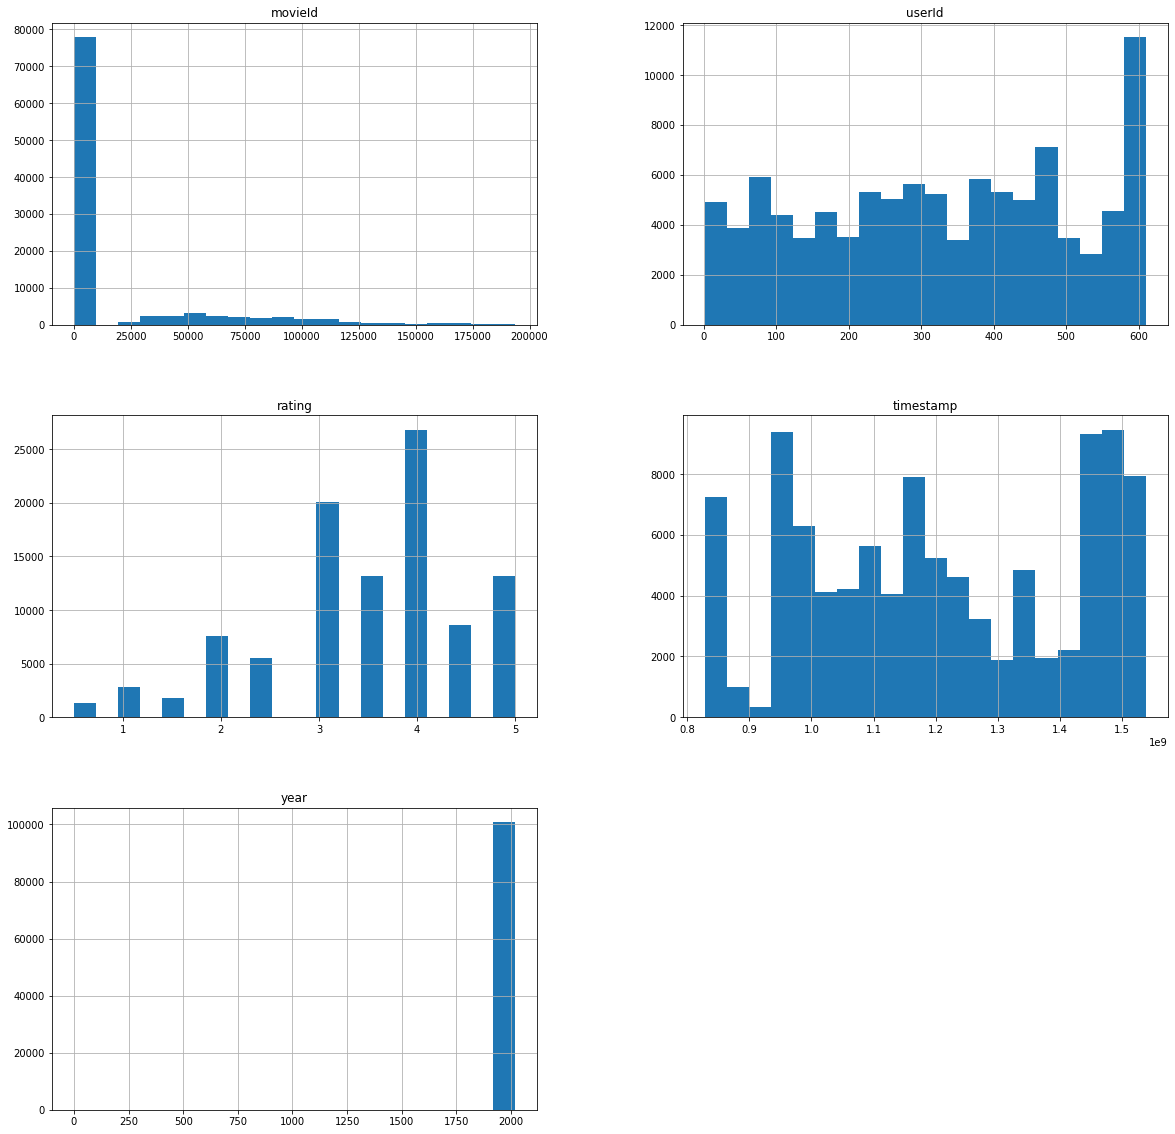

In [20]:
df.hist(bins=20, figsize=(20,20));
# 변수 값별 히스토그램 확인

In [43]:
from surprise import SVD
from surprise import Reader
from surprise import accuracy
from surprise import Dataset
from surprise import KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [29]:
# 데이터 로드해주기
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# train test 셋 나눠주기
train, test = train_test_split(data, test_size=0.2, random_state=123)

In [35]:
# svd 적합
svd = SVD()
svd.fit(train)

In [36]:
# svd 모델 평가
prediction = svd.test(test)
print('prediction type: ', type(prediction),
     'size: ', len(prediction))
print()
print('prediction 결과값 5개 미리보기')
print(prediction[:5])

prediction type:  <class 'list'> size:  20168

prediction 결과값 5개 미리보기
[Prediction(uid=220, iid=62434, r_ui=3.5, est=3.6973434302612045, details={'was_impossible': False}), Prediction(uid=28, iid=4855, r_ui=2.5, est=3.2721077072511826, details={'was_impossible': False}), Prediction(uid=140, iid=5879, r_ui=1.0, est=3.320987218589729, details={'was_impossible': False}), Prediction(uid=438, iid=4022, r_ui=3.5, est=3.7885932327036773, details={'was_impossible': False}), Prediction(uid=561, iid=136020, r_ui=2.5, est=3.079541033732164, details={'was_impossible': False})]


In [37]:
# user id, item id, 예측평점값들만 추출해서 하나의 튜플로 담겨있도록 하기
result = [(pred.uid, pred.iid, pred.est) for pred in prediction[:5]]
print(result)

[(220, 62434, 3.6973434302612045), (28, 4855, 3.2721077072511826), (140, 5879, 3.320987218589729), (438, 4022, 3.7885932327036773), (561, 136020, 3.079541033732164)]


In [38]:
# 개별 데이터에 대한 예측값 반환을 위해서 predict() 사용
# user id, item id는 문자열로 되어있기 때문에 문자열로 넣어주기
uid = str(196)
iid = str(302)
# 변수 순서 지켜주어서 넣어주기
pred = svd.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 3.51   {'was_impossible': False}


In [41]:
predictions = svd.test(test)
print('svd 정확도', accuracy.rmse(predictions))

RMSE: 0.8730
svd 정확도 0.8730416187666011


In [46]:
# knn 가중치 예측방법  _ knnbasic
sim_options = {'name': 'pearson_baseline'}
algo = KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7491535340139377

In [47]:
# knnwithmeans
sim_options = {'name': 'pearson_baseline'}
algo = KNNWithMeans(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.6797075798743328

In [48]:
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse

In [ ]:
## surprise 알고리즘 사용해서 rmse 확인해보기


benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    


#### 여러 알고리즘 결과들 확인하려고 코드를 가져와보았는데, 아무리 기다려도 끝나지 않습니다....

In [39]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results